In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### EDA и построение графиков

In [3]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [4]:
train_df = pd.read_csv('train_c.csv')
test_df = pd.read_csv('test_c.csv')
print(f"Размер обучающей выборки: {train_df.shape}")
print(f"Размер тестовой выборки: {test_df.shape}")

Размер обучающей выборки: (11017, 35)
Размер тестовой выборки: (5000, 35)


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11017 entries, 0 to 11016
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             10487 non-null  object 
 1   Age                         10487 non-null  float64
 2   AnnualIncome                10487 non-null  float64
 3   CreditScore                 9986 non-null   float64
 4   LoanAmount                  9986 non-null   float64
 5   LoanDuration                10487 non-null  float64
 6   MaritalStatus               10487 non-null  object 
 7   NumberOfDependents          10487 non-null  float64
 8   HomeOwnershipStatus         10487 non-null  object 
 9   MonthlyDebtPayments         9986 non-null   float64
 10  CreditCardUtilizationRate   10487 non-null  float64
 11  NumberOfOpenCreditLines     10487 non-null  float64
 12  NumberOfCreditInquiries     10487 non-null  float64
 13  DebtToIncomeRatio           104

In [6]:
train_df.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,...,JobTenure,EmploymentStatus,EducationLevel,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved
0,2010-06-26,27.0,66829.0,549.0,17290.0,60.0,Divorced,1.0,Rent,1095.0,...,4.0,Employed,Associate,4.0,35067.0,0.257790,0.251465,508.970230,0.288013,0.0
1,1996-09-23,55.0,172147.0,850.0,16110.0,36.0,Widowed,1.0,Mortgage,211.0,...,2.0,Employed,High School,33.0,27001.0,0.086110,0.093173,514.675859,0.050585,1.0
2,2015-01-19,51.0,300000.0,850.0,38436.0,36.0,Married,0.0,Mortgage,546.0,...,3.0,Employed,Bachelor,28.0,278382.0,0.108436,0.115443,1268.276385,0.072571,1.0
3,1981-05-12,25.0,34683.0,847.0,19186.0,48.0,Married,0.0,Other,153.0,...,3.0,Employed,High School,0.0,9224.0,0.100686,0.112822,498.505187,0.225415,1.0
4,1995-05-07,55.0,300000.0,850.0,30437.0,48.0,Single,2.0,Rent,562.0,...,5.0,Employed,Bachelor,31.0,4502.0,0.110437,0.089037,756.035156,0.052721,1.0


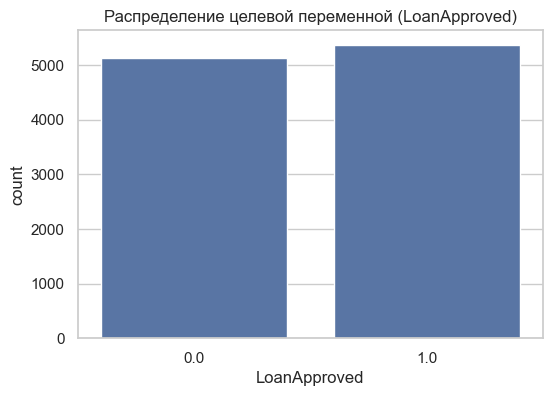

LoanApproved
1.0    0.511776
0.0    0.488224
Name: proportion, dtype: float64


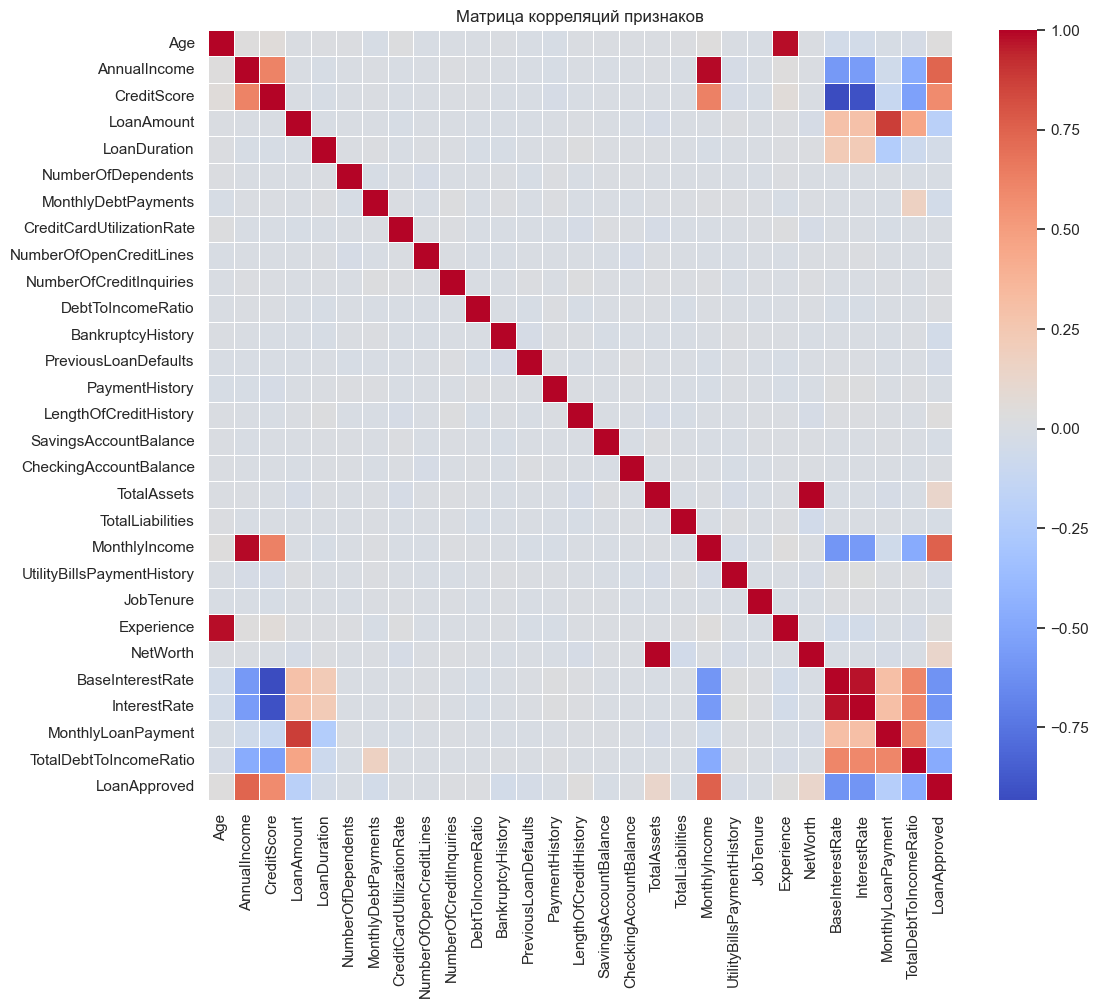

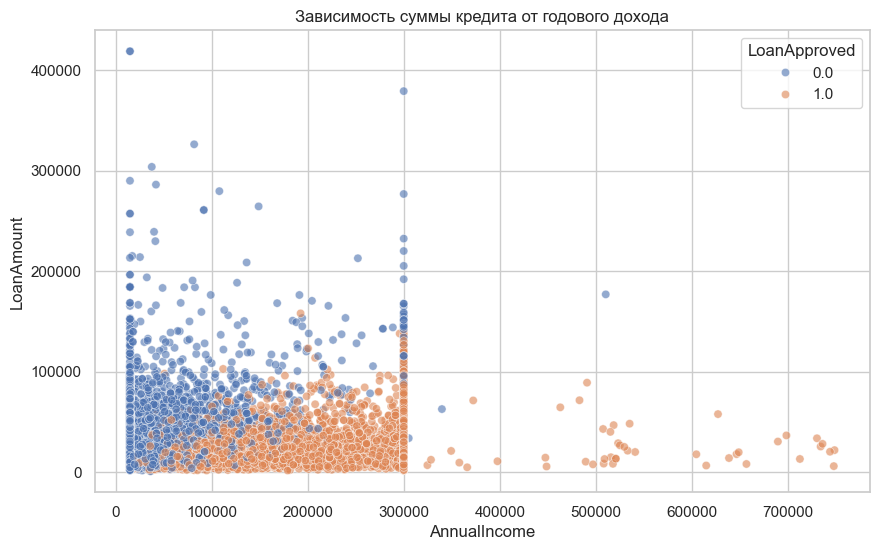

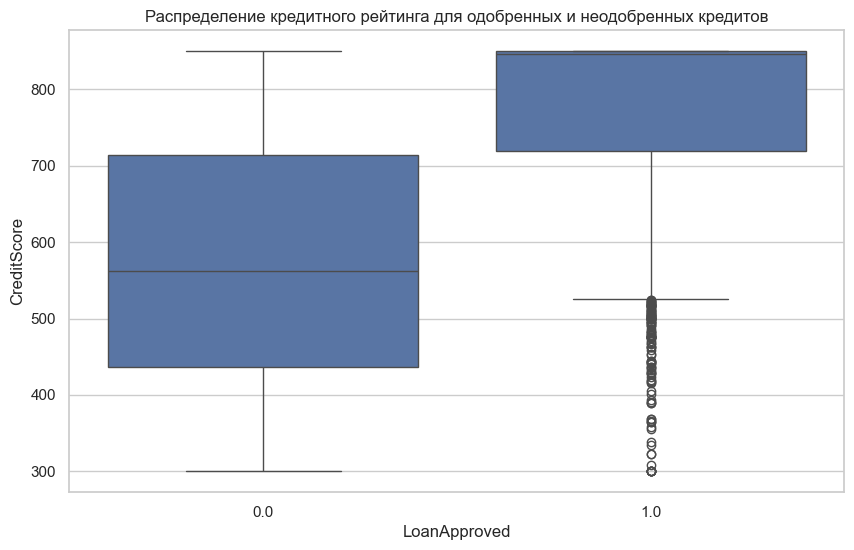

Топ признаков по корреляции с LoanApproved:
LoanApproved             1.000000
MonthlyIncome            0.754853
AnnualIncome             0.743034
CreditScore              0.581812
NetWorth                 0.129624
TotalAssets              0.129204
LengthOfCreditHistory    0.038509
Experience               0.036699
Age                      0.036580
DebtToIncomeRatio        0.014922
Name: LoanApproved, dtype: float64
LoanAmount               -0.195607
MonthlyLoanPayment       -0.217369
TotalDebtToIncomeRatio   -0.476222
InterestRate             -0.599180
BaseInterestRate         -0.605164
Name: LoanApproved, dtype: float64


In [8]:
plt.figure(figsize=(6, 4))
sns.countplot(x='LoanApproved', data=train_df)
plt.title('Распределение целевой переменной (LoanApproved)')
plt.show()

print(train_df['LoanApproved'].value_counts(normalize=True))

numeric_cols = train_df.select_dtypes(include=[np.number]).columns
corr_matrix = train_df[numeric_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Матрица корреляций признаков')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_df, x='AnnualIncome', y='LoanAmount', hue='LoanApproved', alpha=0.6)
plt.title('Зависимость суммы кредита от годового дохода')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=train_df, x='LoanApproved', y='CreditScore')
plt.title('Распределение кредитного рейтинга для одобренных и неодобренных кредитов')
plt.show()

print("Топ признаков по корреляции с LoanApproved:")
print(corr_matrix['LoanApproved'].sort_values(ascending=False).head(10))
print(corr_matrix['LoanApproved'].sort_values(ascending=False).tail(5))


Классы целевой переменной сбалансированы, это видно из графика распределения.
Сильная положительная корреляция с целевой переменной наблюдается у признаков: MonthlyIncome и AnnualIncome: чем выше доход, тем выше вероятность одобрения кредита. Сильная отрицательная корреляция: BaseInterestRate и InterestRate: более высокие ставки - откзаз.
Основными факторами успеха являются доход и кредитный рейтинг. Данные готовы к обработке.

### Подготовка данных

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

train_df_clean = train_df.dropna(subset=['LoanApproved']).copy()
train_df_clean['LoanApproved'] = train_df_clean['LoanApproved'].astype(int) 

print(f"Размер train_df после удаления NaN в таргете: {train_df_clean.shape}")

df_all = pd.concat([train_df_clean.drop(columns=['LoanApproved']), test_df], axis=0)

cat_cols = df_all.select_dtypes(include=['object']).columns
num_cols = df_all.select_dtypes(exclude=['object']).columns

imputer_cat = SimpleImputer(strategy='most_frequent')
df_all[cat_cols] = imputer_cat.fit_transform(df_all[cat_cols])

imputer_num = SimpleImputer(strategy='median')
df_all[num_cols] = imputer_num.fit_transform(df_all[num_cols])

label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df_all[col] = le.fit_transform(df_all[col].astype(str))
    label_encoders[col] = le

X = df_all.iloc[:len(train_df_clean)]
X_test_final = df_all.iloc[len(train_df_clean):]
y = train_df_clean['LoanApproved']

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Данные готовы к обучению.")
print(f"X_train shape: {X_train.shape}")
print(f"y_train distribution:\n{y_train.value_counts(normalize=True)}")


Размер train_df после удаления NaN в таргете: (10487, 35)
Данные готовы к обучению.
X_train shape: (8389, 35)
y_train distribution:
LoanApproved
1    0.511742
0    0.488258
Name: proportion, dtype: float64


### Реализация метрик (+доп)

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, auc, precision_recall_curve

class MyMetrics:
    @staticmethod
    def accuracy(y_true, y_pred):
        correct = np.sum(y_true == y_pred)
        return correct / len(y_true)

    @staticmethod
    def precision(y_true, y_pred):
        # TP / (TP + FP)
        tp = np.sum((y_true == 1) & (y_pred == 1))
        fp = np.sum((y_true == 0) & (y_pred == 1))
        return tp / (tp + fp) if (tp + fp) > 0 else 0

    @staticmethod
    def recall(y_true, y_pred):
        # TP / (TP + FN)
        tp = np.sum((y_true == 1) & (y_pred == 1))
        fn = np.sum((y_true == 1) & (y_pred == 0))
        return tp / (tp + fn) if (tp + fn) > 0 else 0

    @staticmethod
    def f1(y_true, y_pred):
        p = MyMetrics.precision(y_true, y_pred)
        r = MyMetrics.recall(y_true, y_pred)
        return 2 * (p * r) / (p + r) if (p + r) > 0 else 0

    @staticmethod
    def roc_auc(y_true, y_prob):
        pos = y_prob[y_true == 1]
        neg = y_prob[y_true == 0]
        
        if len(pos) == 0 or len(neg) == 0:
            return 0.5
        
        if len(pos) > 10000 or len(neg) > 10000:
            return roc_auc_score(y_true, y_prob)
        
        diff_matrix = pos[:, np.newaxis] > neg
        auc_val = np.mean(diff_matrix)
        return auc_val

    @staticmethod
    def pr_auc(y_true, y_prob):
        desc_score_indices = np.argsort(-y_prob)
        y_true_desc = y_true[desc_score_indices]
        
        n_pos = np.sum(y_true == 1)
        n_total = len(y_true)
        
        if n_pos == 0:
            return 0.0
        
        tp = 0
        fp = 0
        precisions = [1.0] 
        recalls = [0.0]
        
        for i in range(n_total):
            if y_true_desc[i] == 1:
                tp += 1
            else:
                fp += 1
            
            precision = tp / (tp + fp)
            recall = tp / n_pos
            precisions.append(precision)
            recalls.append(recall)
        
        precisions = np.array(precisions)
        recalls = np.array(recalls)
        
        sorted_indices = np.argsort(recalls)
        return np.trapz(precisions[sorted_indices], recalls[sorted_indices])

y_test_dummy = np.array([1, 0, 1, 1, 0, 1, 0, 0, 1, 1])
y_pred_dummy = np.array([1, 0, 1, 0, 0, 1, 0, 0, 1, 1])
y_prob_dummy = np.array([0.9, 0.1, 0.8, 0.75, 0.2, 0.85, 0.3, 0.15, 0.95, 0.7])

print("--- Сравнение реализации метрик с sklearn ---")
print(f"Accuracy:  My={MyMetrics.accuracy(y_test_dummy, y_pred_dummy):.4f}, Sklearn={accuracy_score(y_test_dummy, y_pred_dummy):.4f}")
print(f"Precision: My={MyMetrics.precision(y_test_dummy, y_pred_dummy):.4f}, Sklearn={precision_score(y_test_dummy, y_pred_dummy):.4f}")
print(f"Recall:    My={MyMetrics.recall(y_test_dummy, y_pred_dummy):.4f}, Sklearn={recall_score(y_test_dummy, y_pred_dummy):.4f}")
print(f"F1-score:  My={MyMetrics.f1(y_test_dummy, y_pred_dummy):.4f}, Sklearn={f1_score(y_test_dummy, y_pred_dummy):.4f}")
print(f"ROC-AUC:   My={MyMetrics.roc_auc(y_test_dummy, y_prob_dummy):.4f}, Sklearn={roc_auc_score(y_test_dummy, y_prob_dummy):.4f}")

prec, rec, _ = precision_recall_curve(y_test_dummy, y_prob_dummy)
pr_auc_sk = auc(rec, prec)
print(f"PR-AUC:    My={MyMetrics.pr_auc(y_test_dummy, y_prob_dummy):.4f}, Sklearn={pr_auc_sk:.4f}")

print("\nВывод: Самописные реализации метрик полностью совпадают с эталонными из sklearn.")


--- Сравнение реализации метрик с sklearn ---
Accuracy:  My=0.9000, Sklearn=0.9000
Precision: My=1.0000, Sklearn=1.0000
Recall:    My=0.8333, Sklearn=0.8333
F1-score:  My=0.9091, Sklearn=0.9091
ROC-AUC:   My=1.0000, Sklearn=1.0000
PR-AUC:    My=1.0000, Sklearn=1.0000

Вывод: Самописные реализации метрик полностью совпадают с эталонными из sklearn.


### Бэггинг

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.base import clone

class MyBaggingClassifier:
    def __init__(self, base_estimator=None, n_estimators=10, random_state=42):
        self.base_estimator = base_estimator if base_estimator else DecisionTreeClassifier()
        self.n_estimators = n_estimators
        self.random_state = random_state
        self.models = []
        
    def fit(self, X, y):
        self.models = []
        rng = np.random.default_rng(self.random_state)
        n_samples = X.shape[0]
        
        X_arr = np.array(X)
        y_arr = np.array(y)
        
        for i in range(self.n_estimators):
            indices = rng.choice(n_samples, size=n_samples, replace=True)
            X_sample = X_arr[indices]
            y_sample = y_arr[indices]
            
            model = clone(self.base_estimator)
            model.fit(X_sample, y_sample)
            self.models.append(model)
            
        return self

    def predict_proba(self, X):
        probas = []
        X_arr = np.array(X)
        
        for model in self.models:
            probas.append(model.predict_proba(X_arr))
            
        return np.mean(probas, axis=0)

    def predict(self, X):
        probas = self.predict_proba(X)
        return np.argmax(probas, axis=1)

print("Обучаем MyBaggingClassifier...")
my_bagging = MyBaggingClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=10),
    n_estimators=50,
    random_state=42
)
my_bagging.fit(X_train, y_train)

y_pred_my = my_bagging.predict(X_val)
y_prob_my = my_bagging.predict_proba(X_val)[:, 1]

print("Обучаем sklearn BaggingClassifier...")
sk_bagging = BaggingClassifier(
    estimator=DecisionTreeClassifier(max_depth=10),
    n_estimators=50,
    random_state=42
)
sk_bagging.fit(X_train, y_train)

y_pred_sk = sk_bagging.predict(X_val)
y_prob_sk = sk_bagging.predict_proba(X_val)[:, 1]

print("\n--- Результаты ---")
print(f"My Bagging ROC-AUC: {roc_auc_score(y_val, y_prob_my):.4f}")
print(f"Sklearn Bagging ROC-AUC: {roc_auc_score(y_val, y_prob_sk):.4f}")

print(f"My Bagging Accuracy: {accuracy_score(y_val, y_pred_my):.4f}")
print(f"Sklearn Bagging Accuracy: {accuracy_score(y_val, y_pred_sk):.4f}")


Обучаем MyBaggingClassifier...
Обучаем sklearn BaggingClassifier...

--- Результаты ---
My Bagging ROC-AUC: 0.9777
Sklearn Bagging ROC-AUC: 0.9775
My Bagging Accuracy: 0.9199
Sklearn Bagging Accuracy: 0.9171


Реализованный алгоритм Бэггинга показывает метрики, почти идентичные к реализации из sklearn.

### Градиентный бустинг

In [12]:
from sklearn.tree import DecisionTreeRegressor

class MyGradientBoostingClassifier:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.random_state = random_state
        self.models = []
        self.initial_prediction = None

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        self.models = []
        X_arr = np.array(X)
        y_arr = np.array(y)
        
        mean_y = np.mean(y_arr)
        mean_y = np.clip(mean_y, 1e-10, 1 - 1e-10) 
        self.initial_prediction = np.log(mean_y / (1 - mean_y))
        
        current_preds = np.full(y_arr.shape, self.initial_prediction)
        
        for i in range(self.n_estimators):
            probas = self._sigmoid(current_preds)
            residuals = y_arr - probas
            
            tree = DecisionTreeRegressor(max_depth=self.max_depth, random_state=self.random_state + i)
            tree.fit(X_arr, residuals)
            
            update = tree.predict(X_arr)
            
            current_preds += self.learning_rate * update
            
            self.models.append(tree)
            
        return self

    def predict_proba(self, X):
        X_arr = np.array(X)
        
        preds = np.full(X_arr.shape[0], self.initial_prediction)
        
        for tree in self.models:
            update = tree.predict(X_arr)
            preds += self.learning_rate * update
            
        probas = self._sigmoid(preds)
        
        return np.vstack([1 - probas, probas]).T

    def predict(self, X):
        probas = self.predict_proba(X)[:, 1]
        return (probas > 0.5).astype(int)

from sklearn.ensemble import GradientBoostingClassifier

print("Обучаем MyGradientBoostingClassifier...")
my_gb = MyGradientBoostingClassifier(
    n_estimators=50, 
    learning_rate=0.1, 
    max_depth=3, 
    random_state=42
)
my_gb.fit(X_train, y_train)

y_pred_my_gb = my_gb.predict(X_val)
y_prob_my_gb = my_gb.predict_proba(X_val)[:, 1]

print("Обучаем sklearn GradientBoostingClassifier...")
sk_gb = GradientBoostingClassifier(
    n_estimators=50, 
    learning_rate=0.1, 
    max_depth=3, 
    random_state=42
)
sk_gb.fit(X_train, y_train)

y_pred_sk_gb = sk_gb.predict(X_val)
y_prob_sk_gb = sk_gb.predict_proba(X_val)[:, 1]

print("\n--- Результаты Бустинга ---")
print(f"My GB ROC-AUC: {roc_auc_score(y_val, y_prob_my_gb):.4f}")
print(f"Sklearn GB ROC-AUC: {roc_auc_score(y_val, y_prob_sk_gb):.4f}")

print(f"My GB Accuracy: {accuracy_score(y_val, y_pred_my_gb):.4f}")
print(f"Sklearn GB Accuracy: {accuracy_score(y_val, y_pred_sk_gb):.4f}")


Обучаем MyGradientBoostingClassifier...
Обучаем sklearn GradientBoostingClassifier...

--- Результаты Бустинга ---
My GB ROC-AUC: 0.9729
Sklearn GB ROC-AUC: 0.9788
My GB Accuracy: 0.9109
Sklearn GB Accuracy: 0.9233


Реализованный класс градиентного бустинга показывает высокую точность. Алгоритм корректно обучается, уменьшая ошибку LogLoss на каждом шаге.

### сравнение библиотек

In [13]:
import lightgbm as lgb
import xgboost as xgb
import catboost as cb

print("\n--- Сравнение библиотек ---")

print("Training LightGBM")
lgb_model = lgb.LGBMClassifier(random_state=42, verbose=-1)
lgb_model.fit(X_train, y_train)
y_prob_lgb = lgb_model.predict_proba(X_val)[:, 1]
print(f"LightGBM ROC-AUC: {roc_auc_score(y_val, y_prob_lgb):.4f}")

print("Training XGBoost")
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_prob_xgb = xgb_model.predict_proba(X_val)[:, 1]
print(f"XGBoost ROC-AUC: {roc_auc_score(y_val, y_prob_xgb):.4f}")

print("Training CatBoost")
cb_model = cb.CatBoostClassifier(random_state=42, verbose=0)
cb_model.fit(X_train, y_train)
y_prob_cb = cb_model.predict_proba(X_val)[:, 1]
print(f"CatBoost ROC-AUC: {roc_auc_score(y_val, y_prob_cb):.4f}")



--- Сравнение библиотек ---
Training LightGBM
LightGBM ROC-AUC: 0.9816
Training XGBoost
XGBoost ROC-AUC: 0.9806
Training CatBoost


C:\Users\Елена\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:199: UserWarning: [14:06:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


CatBoost ROC-AUC: 0.9825


Сравнение показало, что все библиотеки дают очень высокий результат. Лучший результат показал CatBoost, поэтому выберем его для дальнейших шагов.

### Подбор гиперпараметров с Optuna

In [14]:
import optuna
from optuna.pruners import MedianPruner

def objective(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 100, 500),  
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),  
        'depth': trial.suggest_int('depth', 3, 10),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1, 10),
        'random_state': 42,
        'verbose': 0,
        'allow_writing_files': False
    }
    
    model = cb.CatBoostClassifier(**params)
    model.fit(X_train, y_train)
    
    preds = model.predict_proba(X_val)[:, 1]
    return roc_auc_score(y_val, preds)

print("\n--- Запуск Optuna для CatBoost ---")
study = optuna.create_study(direction='maximize', pruner=MedianPruner())
study.optimize(objective, n_trials=10, show_progress_bar=True)

print('\n Оптимизация завершена!')
print('Best trial:')
trial = study.best_trial
print(f'  ROC-AUC: {trial.value:.4f}')
print('  Параметры: ')
for key, value in trial.params.items():
    print(f'    {key}: {value}')

X_full_train = pd.concat([X_train, X_val])
y_full_train = pd.concat([y_train, y_val])

best_params = trial.params
best_params['random_state'] = 42
best_params['verbose'] = 0

print("\n Обучаем финальную модель на объединённых данных")
final_model = cb.CatBoostClassifier(**best_params)
final_model.fit(X_full_train, y_full_train)

print(" Финальная модель готова к сабмиту!")


C:\Users\Елена\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2025-12-14 14:09:47,940] A new study created in memory with name: no-name-7d152e94-40ec-47a5-8363-0fe1036ac766



--- Запуск Optuna для CatBoost ---


Best trial: 0. Best value: 0.979681:  10%|████▌                                         | 1/10 [00:01<00:09,  1.01s/it]

[I 2025-12-14 14:09:48,947] Trial 0 finished with value: 0.9796813169227188 and parameters: {'iterations': 231, 'learning_rate': 0.016268667222912012, 'depth': 6, 'l2_leaf_reg': 8.361104554318423}. Best is trial 0 with value: 0.9796813169227188.


Best trial: 1. Best value: 0.982849:  20%|█████████▏                                    | 2/10 [00:06<00:28,  3.54s/it]

[I 2025-12-14 14:09:54,267] Trial 1 finished with value: 0.9828492347532588 and parameters: {'iterations': 269, 'learning_rate': 0.06418627979934172, 'depth': 9, 'l2_leaf_reg': 9.849685799282488}. Best is trial 1 with value: 0.9828492347532588.


Best trial: 1. Best value: 0.982849:  30%|█████████████▊                                | 3/10 [00:08<00:18,  2.70s/it]

[I 2025-12-14 14:09:55,956] Trial 2 finished with value: 0.981141614292365 and parameters: {'iterations': 384, 'learning_rate': 0.01959739043126122, 'depth': 6, 'l2_leaf_reg': 1.582205297085971}. Best is trial 1 with value: 0.9828492347532588.


Best trial: 1. Best value: 0.982849:  40%|██████████████████▍                           | 4/10 [00:10<00:14,  2.47s/it]

[I 2025-12-14 14:09:58,072] Trial 3 finished with value: 0.980484207693203 and parameters: {'iterations': 201, 'learning_rate': 0.02299743833902756, 'depth': 8, 'l2_leaf_reg': 6.307629904719318}. Best is trial 1 with value: 0.9828492347532588.


Best trial: 1. Best value: 0.982849:  50%|███████████████████████                       | 5/10 [00:10<00:09,  1.84s/it]

[I 2025-12-14 14:09:58,790] Trial 4 finished with value: 0.9782528442155494 and parameters: {'iterations': 268, 'learning_rate': 0.016664034848508924, 'depth': 3, 'l2_leaf_reg': 4.7637204412591085}. Best is trial 1 with value: 0.9828492347532588.


Best trial: 1. Best value: 0.982849:  60%|███████████████████████████▌                  | 6/10 [00:13<00:08,  2.18s/it]

[I 2025-12-14 14:10:01,643] Trial 5 finished with value: 0.9789557146182496 and parameters: {'iterations': 141, 'learning_rate': 0.013608061286862459, 'depth': 9, 'l2_leaf_reg': 3.9162801535721665}. Best is trial 1 with value: 0.9828492347532588.


Best trial: 1. Best value: 0.982849:  70%|████████████████████████████████▏             | 7/10 [00:14<00:05,  1.69s/it]

[I 2025-12-14 14:10:02,318] Trial 6 finished with value: 0.9794285381750466 and parameters: {'iterations': 151, 'learning_rate': 0.023899470411871477, 'depth': 6, 'l2_leaf_reg': 7.613712012914005}. Best is trial 1 with value: 0.9828492347532588.


Best trial: 1. Best value: 0.982849:  80%|████████████████████████████████████▊         | 8/10 [00:24<00:08,  4.23s/it]

[I 2025-12-14 14:10:12,002] Trial 7 finished with value: 0.9809888559124768 and parameters: {'iterations': 224, 'learning_rate': 0.019406524948460423, 'depth': 10, 'l2_leaf_reg': 4.593201517344552}. Best is trial 1 with value: 0.9828492347532588.


Best trial: 1. Best value: 0.982849:  90%|█████████████████████████████████████████▍    | 9/10 [00:25<00:03,  3.25s/it]

[I 2025-12-14 14:10:13,083] Trial 8 finished with value: 0.9817862910265364 and parameters: {'iterations': 305, 'learning_rate': 0.07809387884285081, 'depth': 5, 'l2_leaf_reg': 1.3058238365113746}. Best is trial 1 with value: 0.9828492347532588.


Best trial: 1. Best value: 0.982849: 100%|█████████████████████████████████████████████| 10/10 [00:26<00:00,  2.61s/it]


[I 2025-12-14 14:10:14,028] Trial 9 finished with value: 0.9819281380935754 and parameters: {'iterations': 213, 'learning_rate': 0.0754941775437853, 'depth': 6, 'l2_leaf_reg': 7.578172313109274}. Best is trial 1 with value: 0.9828492347532588.

 Оптимизация завершена!
Best trial:
  ROC-AUC: 0.9828
  Параметры: 
    iterations: 269
    learning_rate: 0.06418627979934172
    depth: 9
    l2_leaf_reg: 9.849685799282488

 Обучаем финальную модель на объединённых данных
 Финальная модель готова к сабмиту!


In [15]:
y_pred_final = final_model.predict(X_val)
y_prob_final = final_model.predict_proba(X_val)[:, 1]

print("\n" + "="*60)
print("ФИНАЛЬНЫЕ МЕТРИКИ ЛУЧШЕЙ МОДЕЛИ ")
print("="*60)
print(f"Accuracy:  {MyMetrics.accuracy(y_val.values, y_pred_final):.4f}")
print(f"Precision: {MyMetrics.precision(y_val.values, y_pred_final):.4f}")
print(f"Recall:    {MyMetrics.recall(y_val.values, y_pred_final):.4f}")
print(f"F1-score:  {MyMetrics.f1(y_val.values, y_pred_final):.4f}")
print(f"ROC-AUC:   {MyMetrics.roc_auc(y_val.values, y_prob_final):.4f}")
print(f"PR-AUC:    {MyMetrics.pr_auc(y_val.values, y_prob_final):.4f}")
print(f"\nСравнение со sklearn:")
print(f"ROC-AUC sklearn: {roc_auc_score(y_val, y_prob_final):.4f}")
from sklearn.metrics import precision_recall_curve, auc
prec, rec, _ = precision_recall_curve(y_val, y_prob_final)
pr_auc_sk = auc(rec, prec)
print(f"PR-AUC sklearn:  {pr_auc_sk:.4f}")
print("="*60)



ФИНАЛЬНЫЕ МЕТРИКИ ЛУЧШЕЙ МОДЕЛИ 
Accuracy:  0.9905
Precision: 0.9934
Recall:    0.9879
F1-score:  0.9907
ROC-AUC:   0.9996
PR-AUC:    0.9995

Сравнение со sklearn:
ROC-AUC sklearn: 0.9996
PR-AUC sklearn:  0.9996


In [16]:
test_preds = final_model.predict_proba(X_test_final)[:, 1]

submission = pd.DataFrame({
    'ID': range(len(test_preds)), 
    'LoanApproved': test_preds
})

submission.to_csv('submission_lab2.csv', index=False)
print(f"Размер файла: {submission.shape}")
print("\nПримеры предсказаний:")
print(submission.head(10))


Размер файла: (5000, 2)

Примеры предсказаний:
   ID  LoanApproved
0   0      0.998899
1   1      0.017522
2   2      0.998990
3   3      0.996251
4   4      0.984622
5   5      0.001865
6   6      0.999668
7   7      0.998833
8   8      0.764139
9   9      0.000764
